# Keras-Test

In [1]:
import tensorflow
from tensorflow.keras import models
from tensorflow.keras.layers import *
from tensorflow.keras.initializers import *
from tensorflow.keras.optimizers import *
import matplotlib.pyplot as plt
import numpy as np

x_train = np.array([[2.1,3.2,4.4,4.6,3.6,0.7,0.8,1.5,2.1,2.9,3.6,4.2],
                    [0.2,0.7,0.4,1.4,1.7,0.5,1.5,2.5,1.2,2.2,2.7,2.0]]).T
y_train = np.array([1,1,1,1,1,0,0,0,0,0,0,0])#.reshape(-1,1)

2024-06-20 14:11:53.539671: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Sigmoid mit Cross-Entropie

Modell $$\phi(b+w_1x_1+w_2x_2)$$ mit Sigmoid, optimierung via cross-Entropie

In [10]:
# Definition des Keras Modells
model = models.Sequential()

# Input Layer
# x1, x2 --> shape=(2,)
# Bias wird automatisch gesetzt
model.add(Input(shape=(2,)))

# Output Layer
model.add(Dense(1, activation='sigmoid'))

lr = 0.01
optimizer = SGD()   #(learning_rate=lr)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
# oder loss='mse' --> mean squared error

model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3 (12.00 B)

 Trainable params: 3 (12.00 B)

 Non-trainable params: 0 (0.00 B)

In [11]:
# Training
history = model.fit(x_train, y_train, epochs=50, batch_size=1)
# batch size --> Mini-Batch SDG
# batch_size=1 == SGD

# Evaluation (eigentlich auf Test-Daten)
L, accuracy = model.evaluate(x_train, y_train)
print('Loss: %.2f' % L +',  Accuracy: %.2f' % (accuracy*100))

Epoch 1/50


12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5301 - loss: 1.3534  
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6221 - loss: 1.1730 
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1897 - loss: 1.6575     
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1600 - loss: 1.2432     
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1718 - loss: 1.1684     
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1682 - loss: 0.9600     
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0361 - loss: 1.0388     
Epoch 8/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1810 - loss: 0.9049     
Epoch 9/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1957 - loss: 0.8883     
Epoch 10/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2042 - loss: 0.8857     
Epoch 11/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0403 - loss: 0.9452     
Epoch 12/50
12/12 ━━━━━━━━━━━━━━━━━━━

dict_keys(['accuracy', 'loss'])


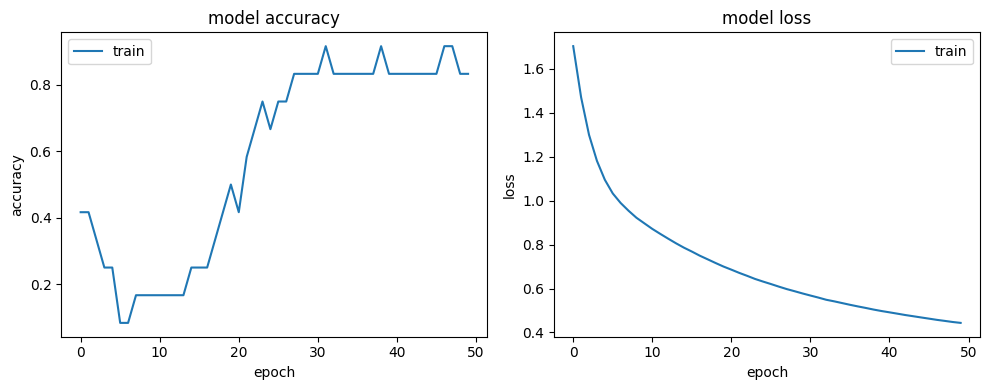

In [12]:
print(history.history.keys())

fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(10,4))

axs[0].plot(history.history['accuracy'])
axs[0].set_title('model accuracy')
axs[0].set_xlabel('epoch')
axs[0].set_ylabel('accuracy')
axs[0].legend(['train', 'test'], loc='upper left')

axs[1].plot(history.history['loss'])
axs[1].set_title('model loss')
axs[1].set_xlabel('epoch')
axs[1].set_ylabel('loss')
axs[1].legend(['train', 'test'], loc='upper right')

plt.tight_layout()
plt.show()

## Weiterer Layer mit ReLu

**Aufgabe:** führen Sie einen weiteren Dense-Layer mit 2 Neuronen und ReLu-Aktivierung ein

In [13]:
# Definition des Keras Modells
model = models.Sequential()

# Input Layer
model.add(Input(shape=(2,)))

# Hidden Layer
model.add(Dense(5, activation='relu'))
model.add(Dense(5, activation='relu'))

# Output Layer
model.add(Dense(1, activation='sigmoid'))

lr = 0.01
optimizer = SGD()   #(learning_rate=lr)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
# oder loss='mse' --> mean squared error

model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 5)              │            15 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 5)              │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 51 (204.00 B)

 Trainable params: 51 (204.00 B)

 Non-trainable params: 0 (0.00 B)

In [14]:
# Training
history = model.fit(x_train, y_train, epochs=50, batch_size=1)

# Evaluation (eigentlich auf Test-Daten)
L, accuracy = model.evaluate(x_train, y_train)
print('Loss: %.2f' % L +',  Accuracy: %.2f' % (accuracy*100))

Epoch 1/50


12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7030 - loss: 0.7961  
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5611 - loss: 0.8385 
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3431 - loss: 0.8607     
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4532 - loss: 0.7658 
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2782 - loss: 0.8310     
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1984 - loss: 0.8050     
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4425 - loss: 0.7384 
Epoch 8/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4684 - loss: 0.7267 
Epoch 9/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3358 - loss: 0.7255     
Epoch 10/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3102 - loss: 0.7347     
Epoch 11/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2355 - loss: 0.7491     
Epoch 12/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/ste

dict_keys(['accuracy', 'loss'])


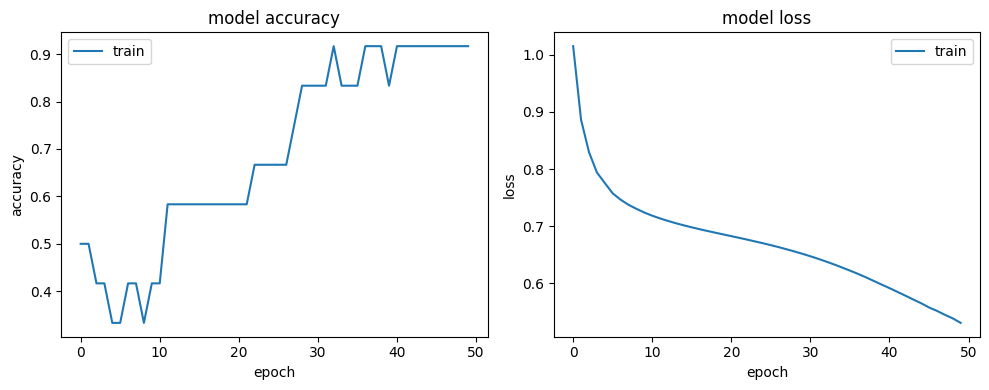

In [15]:
print(history.history.keys())

fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(10,4))

axs[0].plot(history.history['accuracy'])
axs[0].set_title('model accuracy')
axs[0].set_xlabel('epoch')
axs[0].set_ylabel('accuracy')
axs[0].legend(['train', 'test'], loc='upper left')

axs[1].plot(history.history['loss'])
axs[1].set_title('model loss')
axs[1].set_xlabel('epoch')
axs[1].set_ylabel('loss')
axs[1].legend(['train', 'test'], loc='upper right')

plt.tight_layout()
plt.show()

# Aktivierungsfunktion für Output Layer

- Regression
    - keine Aktivierung für letzte Schicht
- Klassifikation $(y\in[0,1])$
    - bspw. Sigmoid, $\tanh$

$\Rightarrow$ entscheidet über Output-Layer